# Exploratory Data Analysis (EDA)

### Importing needful libraries and modules

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud
import numpy as np
from sklearn.preprocessing import StandardScaler

### EDA


In [3]:
# Read the CSV files into pandas DataFrames
df = pd.read_csv('C:/Users/DELL/Desktop/Research/Data/PreprocessedDataset.csv')

In [4]:
df

,asin,name,rating,date,verified,helpfulVotes,brand,product,url,image,averageRating,reviewUrl,totalReviews,price,originalPrice,mergedReviewText
0,B0009N5L7K,Marcel Thomas,1,"March 5, 2016",True,0.0,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.00,Stupid phone DON'T BUY OUT OF SERVICE
1,B0009N5L7K,William B.,4,"February 9, 2006",False,0.0,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.00,Exellent Service I have been with nextel for n...
2,B0009N5L7K,K. Mcilhargey,5,"February 7, 2006",False,0.0,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.00,I love it I just got it and have to say its ea...
3,B0009N5L7K,Stephen Cahill,1,"December 20, 2016",True,0.0,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.00,Phones locked 1 star because the phones locked...
4,B0009N5L7K,Mihir,5,"December 13, 2009",True,0.0,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.00,Excellent product The product has been very go...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67764,B081H6STQQ,jande,5,"August 16, 2019",False,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00,"Awesome Phone, but finger scanner is a big mis..."
67765,B081H6STQQ,2cool4u,5,"September 14, 2019",False,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00,Simply Amazing! I've been an Xperia user for s...
67766,B081H6STQQ,simon,5,"July 14, 2019",False,0.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,https://www.amazon.com/Sony-Smartphone-WH1000X...,https://m.media-amazon.com/images/I/51zZTAXZTP...,4.5,https://www.amazon.com/product-reviews/B081H6STQQ,70,948.00,0.00,"great phon3, but many bugs need to fix. still ..."
67767,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,0.0,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",https://www.amazon.com/Apple-iPhone-64GB-Gray-...,https://m.media-amazon.com/images/I/71yMgOenT5...,5.0,https://www.amazon.com/product-reviews/B081TJFVCJ,1,478.97,0.00,Phone is like new Product looks and works like...


### Remove unnessary column 

In [5]:
# List of columns to remove
columns_to_remove = ['name', 'url', 'image', 'reviewUrl', 'originalPrice', 'price']

# Remove the columns
df = df.drop(columns=columns_to_remove)

# Verify that the columns have been removed
print(df.columns)

Index(['asin', 'rating', 'date', 'verified', 'helpfulVotes', 'brand',
       'product', 'averageRating', 'totalReviews', 'mergedReviewText'],
      dtype='object')


##### Piechart for 'verified' column

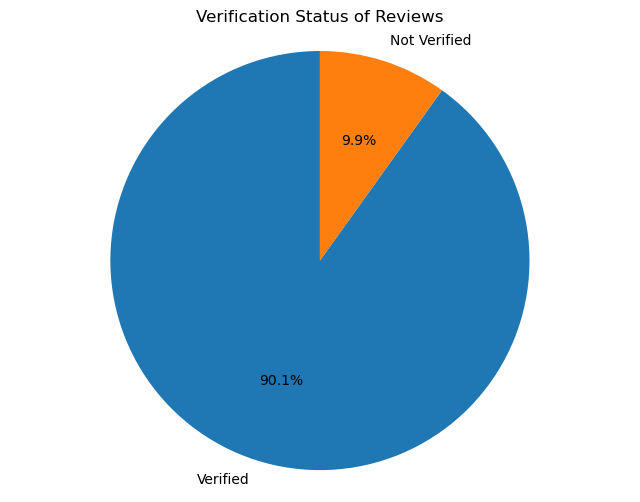

In [6]:
# Convert 'verified' column to a more descriptive categorical variable
df['verification_status'] = df['verified'].map({True: 'Verified', False: 'Not Verified'})

# Calculate the count of each verification status
verification_counts = df['verification_status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(verification_counts, labels=verification_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Verification Status of Reviews')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


##### Bar plot for average rating by 'brand

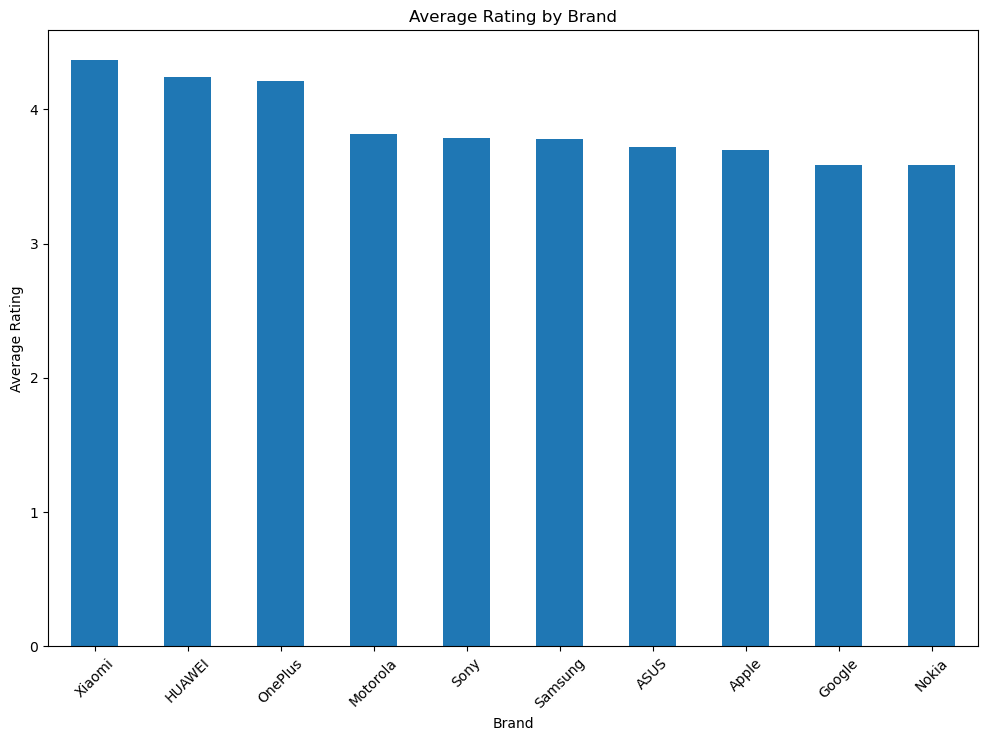

In [7]:
avg_rating_by_brand = df.groupby('brand')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_rating_by_brand.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.title('Average Rating by Brand')
plt.xticks(rotation=45)
plt.show()


##### Distribution of Rating

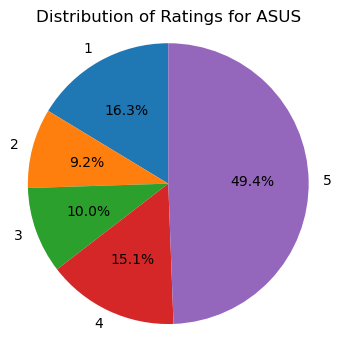

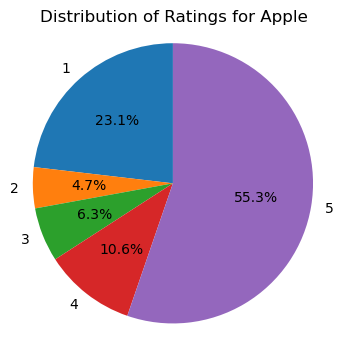

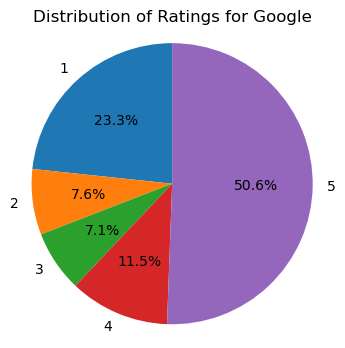

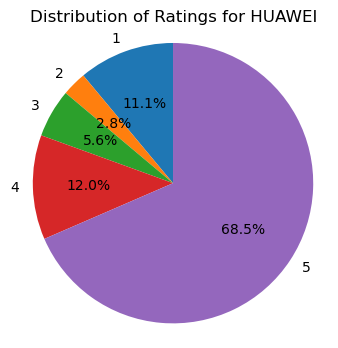

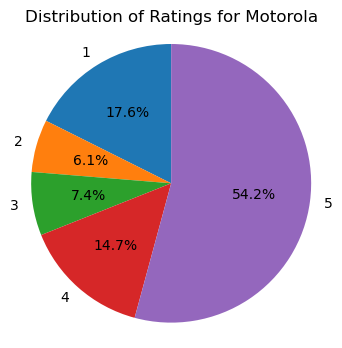

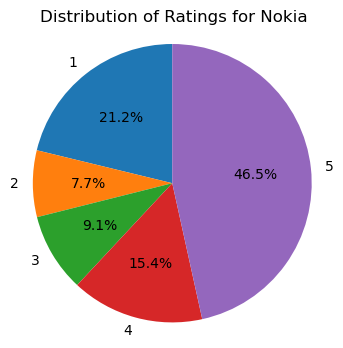

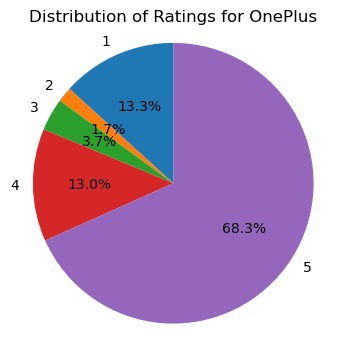

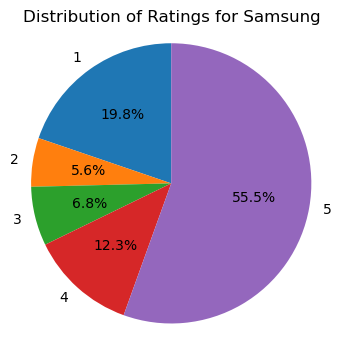

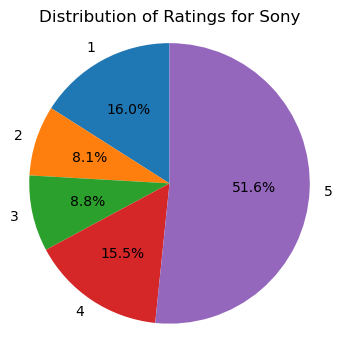

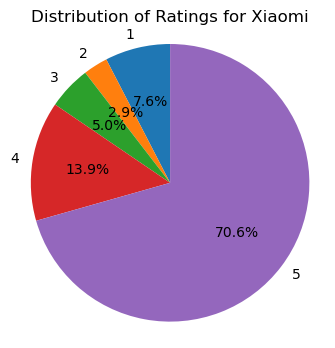

In [8]:
# Group by 'brand' and 'rating' to get the count of each rating for each brand
rating_counts = df.groupby(['brand', 'rating']).size().unstack(fill_value=0)

# Iterate over each brand and create a pie chart
for brand in rating_counts.index:
    plt.figure(figsize=(4, 4))
    plt.pie(rating_counts.loc[brand], labels=rating_counts.columns, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of Ratings for {brand}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


##### Total review by Brand and Verification Status

<Figure size 1200x800 with 0 Axes>

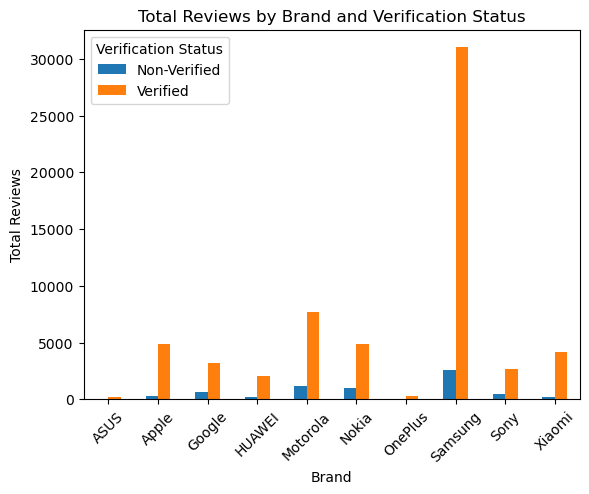

In [9]:
# Group by 'brand' and 'verified' to get the count of reviews for each brand and verification status
reviews_by_brand_verified = df.groupby(['brand', 'verified']).size().unstack(fill_value=0)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
reviews_by_brand_verified.plot(kind='bar', stacked=False)
plt.xlabel('Brand')
plt.ylabel('Total Reviews')
plt.title('Total Reviews by Brand and Verification Status')
plt.xticks(rotation=45)
plt.legend(title='Verification Status', labels=['Non-Verified', 'Verified'])
plt.show()


##### Rating distribution for brand according to verified and non verified 

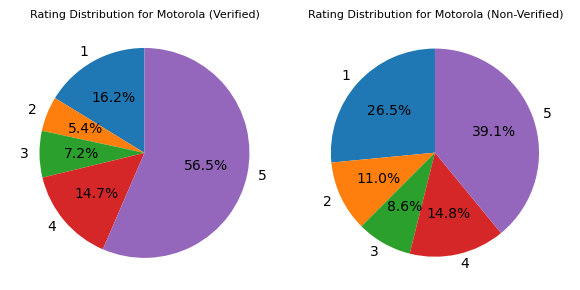

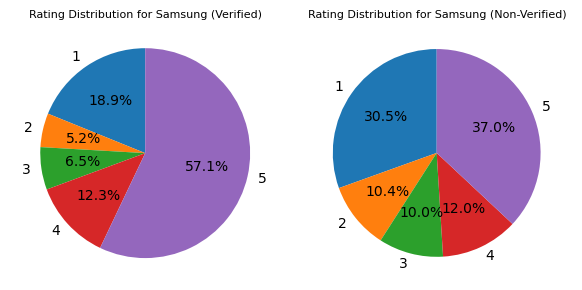

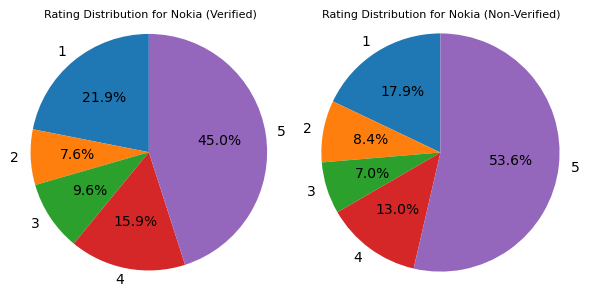

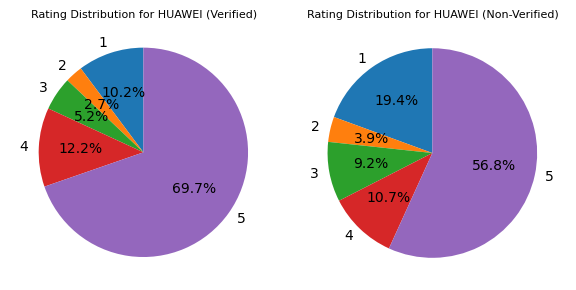

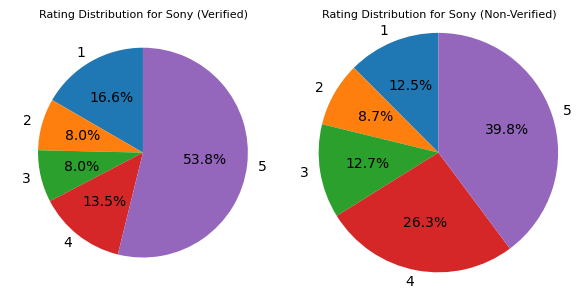

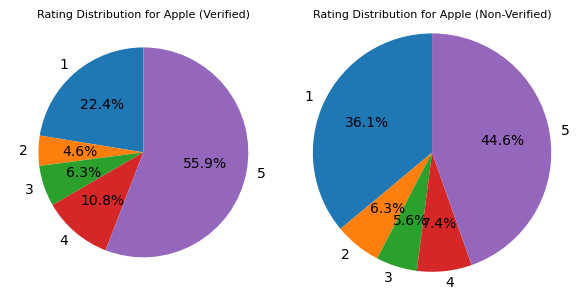

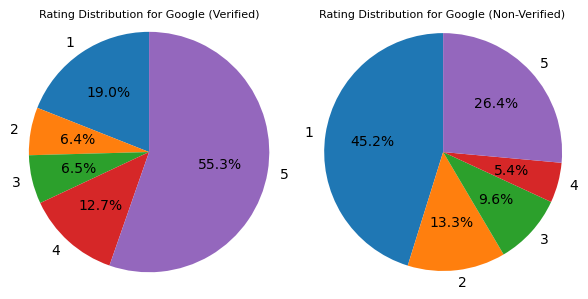

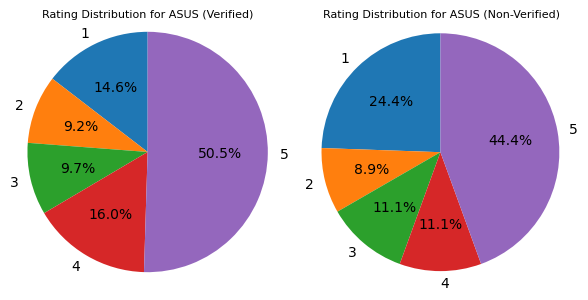

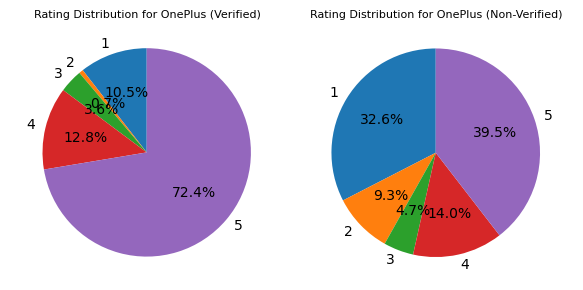

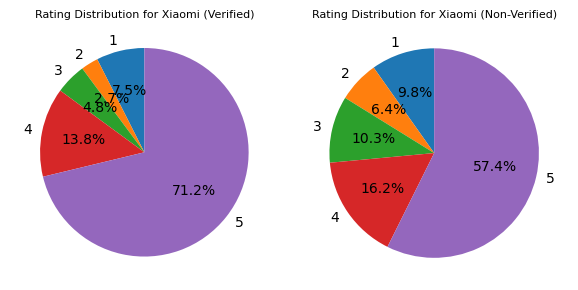

In [53]:
# Filter the data into verified and non-verified subsets
verified_data = df[df['verified'] == True]
non_verified_data = df[df['verified'] == False]

# Calculate the count of each rating for each brand in the verified subset
verified_rating_counts = verified_data.groupby(['brand', 'rating']).size().unstack(fill_value=0)

# Calculate the count of each rating for each brand in the non-verified subset
non_verified_rating_counts = non_verified_data.groupby(['brand', 'rating']).size().unstack(fill_value=0)

# Plotting the pie charts
brands = verified_data['brand'].unique()

for brand in brands:
    plt.figure(figsize=(6, 3))
    
    # Verified reviews pie chart
    plt.subplot(1, 2, 1)
    verified_ratings = verified_rating_counts.loc[brand]
    plt.pie(verified_ratings, labels=verified_ratings.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Rating Distribution for {brand} (Verified)',fontsize=8)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

    # Non-verified reviews pie chart
    plt.subplot(1, 2, 2)
    non_verified_ratings = non_verified_rating_counts.loc[brand]
    plt.pie(non_verified_ratings, labels=non_verified_ratings.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Rating Distribution for {brand} (Non-Verified)',fontsize=8)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

    plt.tight_layout()
    plt.show()


## Check accuracy of sentiment analysis methods

In [11]:
# Sample 300 rows from the DataFrame
sampled_df = df.sample(n=200, random_state=42)  # Set random_state for reproducibility

# Save the sampled DataFrame to a CSV file
sampled_df.to_csv('C:/Users/DELL/Desktop/Research/Data/sampled_data.csv', index=False)

In [12]:
#Sentiment anlysis using polarity score+textblob
manually_analysed_df = pd.read_csv('C:/Users/DELL/Desktop/Research/Data/sampled_data.csv')

In [13]:
manually_analysed_df

,asin,rating,date,verified,helpfulVotes,brand,product,averageRating,totalReviews,mergedReviewText,verification_status,sentimentLabel
0,B07NZVM3RN,5,24-Sep-19,True,0,Samsung,Samsung Galaxy S10e 128GB+6GB RAM SM-G970 Dual...,4.5,213,Very good It's jus what I expected it to be,Verified,Positive
1,B072KPG9PN,1,17-May-18,True,4,Samsung,Samsung Galaxy J3 Prime J327A 16GB 4G LTE 7.0 ...,3.7,183,One Star The phone I received seemed to be a u...,Verified,Negative
2,B07VD3JH2C,5,4-Dec-19,True,0,Xiaomi,"Xiaomi Mi A3 64GB + 4GB RAM, Triple Camera, 4G...",4.5,252,Mejor calidad precio que hay Excelente termina...,Verified,Neutral
3,B07WSJYDXX,3,21-Apr-19,True,0,Motorola,Motorola G6 – 32 GB – Unlocked (AT&T/Sprint/T-...,3.9,836,It doesn't have NFC reader It is good and chea...,Verified,Neutral
4,B01DZ2CS4U,3,29-Oct-17,True,0,Samsung,Samsung Galaxy S7 32GB G930V Unlocked - Black,3.2,250,I expect to use it with any service company ot...,Verified,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
195,B00CS2ZWKQ,5,12-Dec-15,True,1,Nokia,Nokia Lumia 925 (RM-893) 4G LTE Windows 8 Smar...,3.2,94,Five Stars Extremely good for Windows. Enjoyable,Verified,Positive
196,B078WZ86Y9,1,29-Dec-18,True,1,Apple,"Apple iPhone 7, 128GB, Red - For AT&T / T-Mobi...",3.3,58,Messed Up It's not the phone in the picture an...,Verified,Negative
197,B07536MYBQ,5,6-Dec-19,True,0,Samsung,Samsung Galaxy Note8 N950U 64GB Unlocked GSM L...,3.9,546,Neat. Great Phone.,Verified,Positive
198,B01CYYYRNK,4,24-Dec-18,True,0,Samsung,Samsung Galaxy S7 SM-G930A AT&T Unlocked Smart...,3.1,394,A good buy for the money and the quality of th...,Verified,Positive


In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
    return ' '.join(tokens)

In [16]:
manually_analysed_df['clean_text'] = manually_analysed_df['mergedReviewText'].apply(preprocess_text)

In [17]:
#Sentiment Analysis with Polarity Score +TextBlob
def analyze_sentiment_polarity(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

manually_analysed_df['sentiment_polarity'] = manually_analysed_df['clean_text'].apply(analyze_sentiment_polarity)

In [18]:
#Sentiment Analysis with Polarity Score + Subjectivity Score + TextBlob
def analyze_sentiment_combined(text):
    blob = TextBlob(text)
    polarity_score = blob.sentiment.polarity
    subjectivity_score = blob.sentiment.subjectivity
    combined_score = polarity_score + subjectivity_score
    if combined_score > 0.5:
        return 'Positive'
    elif combined_score < 0.5:
        return 'Negative'
    else:
        return 'Neutral'

manually_analysed_df['sentiment_combined'] = manually_analysed_df['clean_text'].apply(analyze_sentiment_combined)

In [19]:
manually_analysed_df

,asin,rating,date,verified,helpfulVotes,brand,product,averageRating,totalReviews,mergedReviewText,verification_status,sentimentLabel,clean_text,sentiment_polarity,sentiment_combined
0,B07NZVM3RN,5,24-Sep-19,True,0,Samsung,Samsung Galaxy S10e 128GB+6GB RAM SM-G970 Dual...,4.5,213,Very good It's jus what I expected it to be,Verified,Positive,good jus expected,Positive,Positive
1,B072KPG9PN,1,17-May-18,True,4,Samsung,Samsung Galaxy J3 Prime J327A 16GB 4G LTE 7.0 ...,3.7,183,One Star The phone I received seemed to be a u...,Verified,Negative,one star phone received seemed used phone high...,Positive,Positive
2,B07VD3JH2C,5,4-Dec-19,True,0,Xiaomi,"Xiaomi Mi A3 64GB + 4GB RAM, Triple Camera, 4G...",4.5,252,Mejor calidad precio que hay Excelente termina...,Verified,Neutral,mejor calidad precio que hay excelente termina...,Neutral,Negative
3,B07WSJYDXX,3,21-Apr-19,True,0,Motorola,Motorola G6 – 32 GB – Unlocked (AT&T/Sprint/T-...,3.9,836,It doesn't have NFC reader It is good and chea...,Verified,Neutral,nfc reader good cheap appeared nfc reader reas...,Positive,Positive
4,B01DZ2CS4U,3,29-Oct-17,True,0,Samsung,Samsung Galaxy S7 32GB G930V Unlocked - Black,3.2,250,I expect to use it with any service company ot...,Verified,Neutral,expect use service company expect use service ...,Negative,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,B00CS2ZWKQ,5,12-Dec-15,True,1,Nokia,Nokia Lumia 925 (RM-893) 4G LTE Windows 8 Smar...,3.2,94,Five Stars Extremely good for Windows. Enjoyable,Verified,Positive,five stars extremely good windows enjoyable,Positive,Positive
196,B078WZ86Y9,1,29-Dec-18,True,1,Apple,"Apple iPhone 7, 128GB, Red - For AT&T / T-Mobi...",3.3,58,Messed Up It's not the phone in the picture an...,Verified,Negative,messed phone picture realize already shipped,Neutral,Negative
197,B07536MYBQ,5,6-Dec-19,True,0,Samsung,Samsung Galaxy Note8 N950U 64GB Unlocked GSM L...,3.9,546,Neat. Great Phone.,Verified,Positive,neat great phone,Positive,Positive
198,B01CYYYRNK,4,24-Dec-18,True,0,Samsung,Samsung Galaxy S7 SM-G930A AT&T Unlocked Smart...,3.1,394,A good buy for the money and the quality of th...,Verified,Positive,good buy money quality phone seems really good...,Positive,Positive


In [20]:
from sklearn.metrics import accuracy_score

# Assuming 'manual_sentiment_label' is the column name of manually analyzed sentiment labels
manual_sentiments = manually_analysed_df['sentimentLabel']

# Calculate accuracy for polarity-based sentiment analysis
predicted_sentiments_polarity = manually_analysed_df['clean_text'].apply(analyze_sentiment_polarity)
accuracy_polarity = accuracy_score(manual_sentiments, predicted_sentiments_polarity)

# Calculate accuracy for combined polarity and subjectivity-based sentiment analysis
predicted_sentiments_combined = manually_analysed_df['clean_text'].apply(analyze_sentiment_combined)
accuracy_combined = accuracy_score(manual_sentiments, predicted_sentiments_combined)

print(f"Accuracy for polarity-based sentiment analysis: {accuracy_polarity}")
print(f"Accuracy for combined sentiment analysis: {accuracy_combined}")


Accuracy for polarity-based sentiment analysis: 0.645
Accuracy for combined sentiment analysis: 0.735


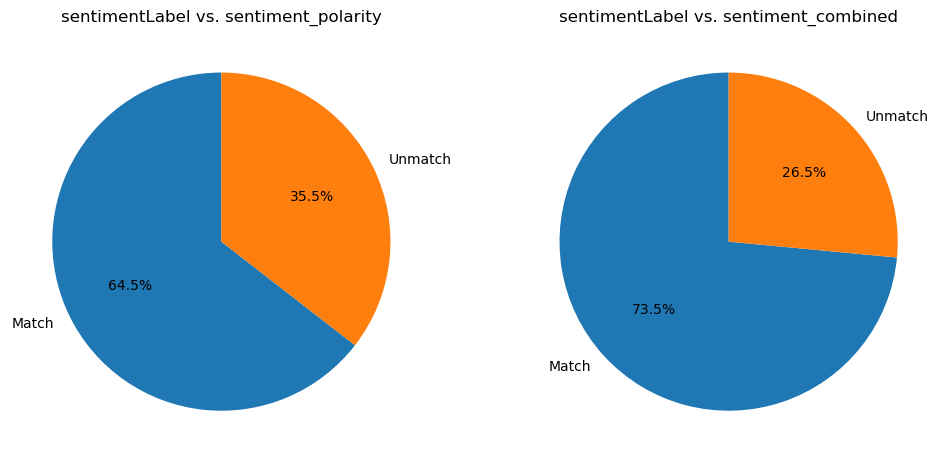

In [21]:
#comparison of results
# Function to compare columns
def compare_columns(df, col1, col2):
    return df[col1] == df[col2]

# Compare sentimentLabel with sentiment_polarity
match_polarity = compare_columns(manually_analysed_df, 'sentimentLabel', 'sentiment_polarity')

# Compare sentimentLabel with sentiment_combined
match_combined = compare_columns(manually_analysed_df, 'sentimentLabel', 'sentiment_combined')

# Create pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie([len(match_polarity[match_polarity == True]), len(match_polarity[match_polarity == False])],
        labels=['Match', 'Unmatch'],
        autopct='%1.1f%%',
        startangle=90)
ax1.set_title('sentimentLabel vs. sentiment_polarity')

ax2.pie([len(match_combined[match_combined == True]), len(match_combined[match_combined == False])],
        labels=['Match', 'Unmatch'],
        autopct='%1.1f%%',
        startangle=90)
ax2.set_title('sentimentLabel vs. sentiment_combined')

plt.show()

In [22]:
#mismatched_rows = manually_analysed_df[manually_analysed_df['sentimentLabel'] != manually_analysed_df['sentiment_combined']]
#mismatched_rows
#mismatched_rows.to_csv('C:/Users/DELL/Desktop/Research/Data/mismatch.csv', index=False)

## Sentiment Analysis

### Data Preparation

In [23]:
stop_words = set(stopwords.words('english'))

In [24]:
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
    return ' '.join(tokens)

In [25]:
df['clean_text'] = df['mergedReviewText'].apply(preprocess_text)

#### Sentiment Analysis with Polarity Score + Subjectivity Score + TextBlob

In [26]:
def analyze_sentiment_combined(text):
    blob = TextBlob(text)
    polarity_score = blob.sentiment.polarity
    subjectivity_score = blob.sentiment.subjectivity
    combined_score = polarity_score + subjectivity_score
    if combined_score > 0.5:
        return 'Positive'
    elif combined_score < 0.5:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_combined'] = df['clean_text'].apply(analyze_sentiment_combined)

In [27]:
df

,asin,rating,date,verified,helpfulVotes,brand,product,averageRating,totalReviews,mergedReviewText,verification_status,clean_text,sentiment_combined
0,B0009N5L7K,1,"March 5, 2016",True,0.0,Motorola,Motorola I265 phone,3.0,7,Stupid phone DON'T BUY OUT OF SERVICE,Verified,stupid phone buy service,Negative
1,B0009N5L7K,4,"February 9, 2006",False,0.0,Motorola,Motorola I265 phone,3.0,7,Exellent Service I have been with nextel for n...,Not Verified,exellent service nextel nearly year started ti...,Positive
2,B0009N5L7K,5,"February 7, 2006",False,0.0,Motorola,Motorola I265 phone,3.0,7,I love it I just got it and have to say its ea...,Not Verified,love got say easy use hear person talking fine...,Positive
3,B0009N5L7K,1,"December 20, 2016",True,0.0,Motorola,Motorola I265 phone,3.0,7,Phones locked 1 star because the phones locked...,Verified,phones locked 1 star phones locked pay additio...,Negative
4,B0009N5L7K,5,"December 13, 2009",True,0.0,Motorola,Motorola I265 phone,3.0,7,Excellent product The product has been very go...,Verified,excellent product product good used cell phone...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67764,B081H6STQQ,5,"August 16, 2019",False,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,"Awesome Phone, but finger scanner is a big mis...",Not Verified,awesome phone finger scanner big miss love cam...,Positive
67765,B081H6STQQ,5,"September 14, 2019",False,1.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,Simply Amazing! I've been an Xperia user for s...,Not Verified,simply amazing xperia user several years say s...,Positive
67766,B081H6STQQ,5,"July 14, 2019",False,0.0,Sony,Sony Xperia 1 Unlocked Smartphone and WH1000XM...,4.5,70,"great phon3, but many bugs need to fix. still ...",Not Verified,great phon3 many bugs need fix still waiting u...,Positive
67767,B081TJFVCJ,5,"December 24, 2019",True,0.0,Apple,"Apple iPhone X, 64GB, Gray - Fully Unlocked (R...",5.0,1,Phone is like new Product looks and works like...,Verified,phone like new product looks works like new mu...,Positive


In [28]:
df.to_csv('C:/Users/DELL/Desktop/Research/Data/sentiment_analysis_data.csv', index=False)

#### Visualization

#### Analysis

In [29]:
print(df.columns)

Index(['asin', 'rating', 'date', 'verified', 'helpfulVotes', 'brand',
       'product', 'averageRating', 'totalReviews', 'mergedReviewText',
       'verification_status', 'clean_text', 'sentiment_combined'],
      dtype='object')


###### Sentment distribution


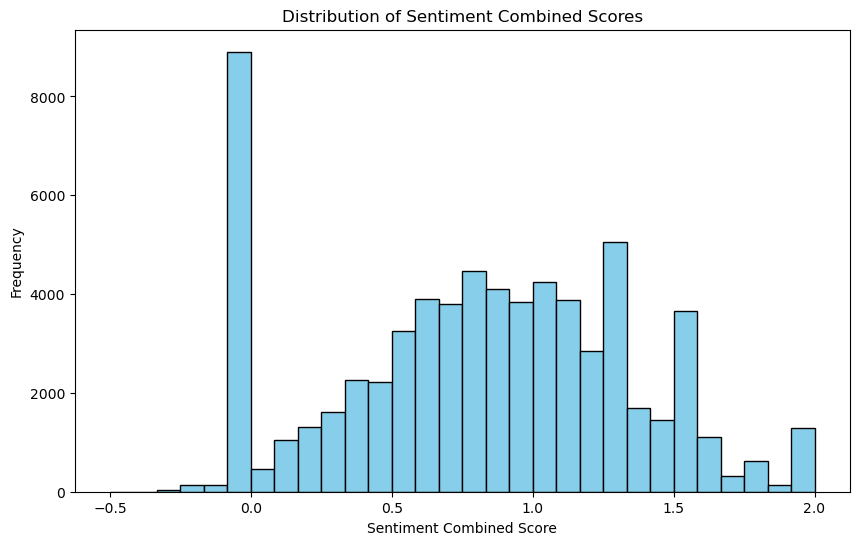

In [39]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Assuming 'clean_text' is the column containing the cleaned text data
df['sentiment_combined_score'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity + TextBlob(x).sentiment.subjectivity)

# Plotting the distribution of sentiment_combined scores
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment_combined_score'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Combined Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Combined Scores')
plt.show()


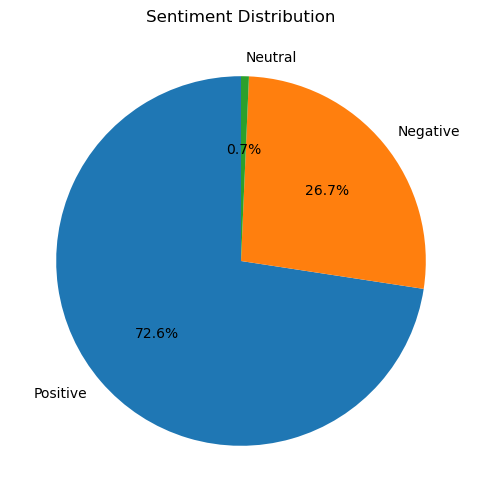

In [30]:
#Sentiment distribution for sentiment combined results
# Pie chart
sentiment_distribution = df['sentiment_combined'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()

##### Sentiment by Brand

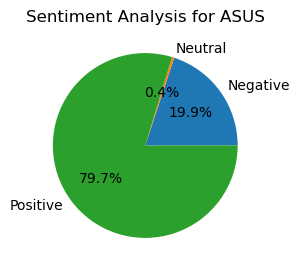

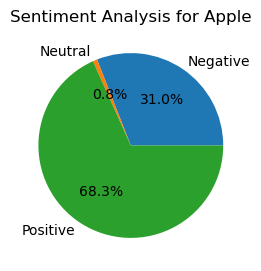

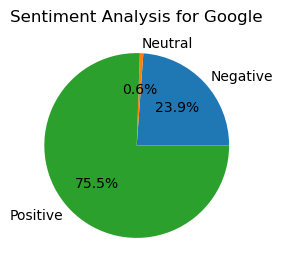

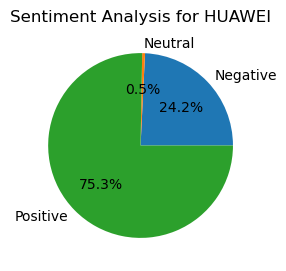

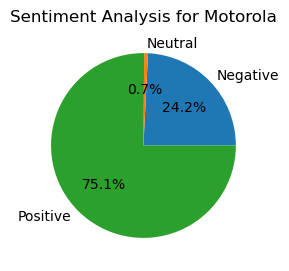

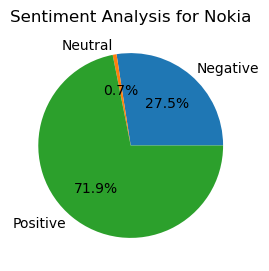

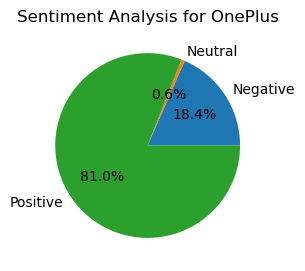

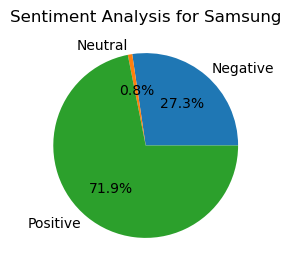

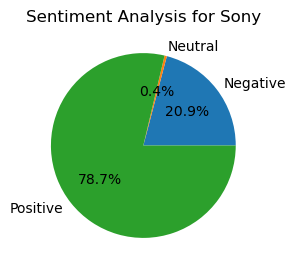

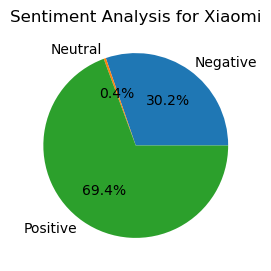

In [31]:
# Calculate sentiment distribution for each brand
sentiment_distribution = df.groupby('brand')['sentiment_combined'].value_counts(normalize=True).unstack()

# Plot a pie chart for each brand
for brand in sentiment_distribution.index:
    plt.figure(figsize=(3, 3))
    plt.pie(sentiment_distribution.loc[brand], labels=sentiment_distribution.columns, autopct='%1.1f%%')
    plt.title(f'Sentiment Analysis for {brand}')
    plt.show()

##### Sentiment by Verification Status

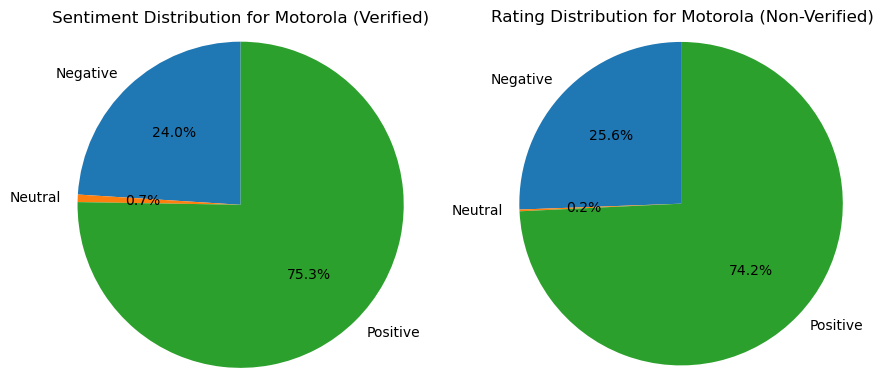

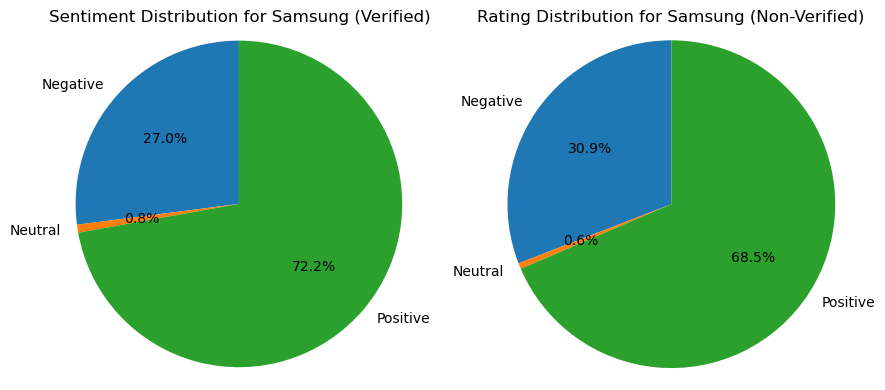

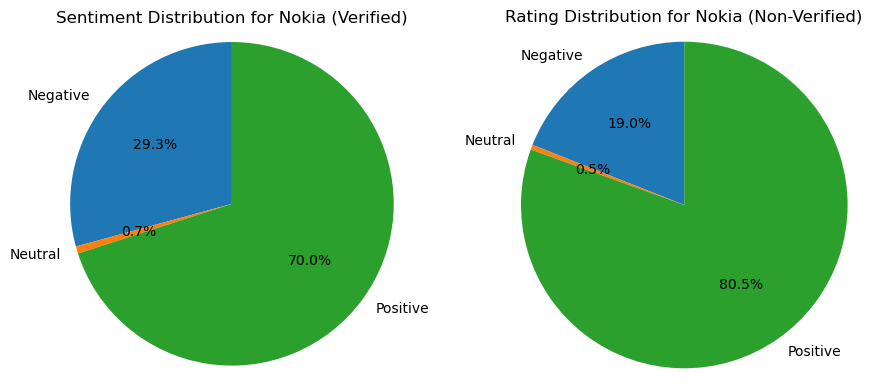

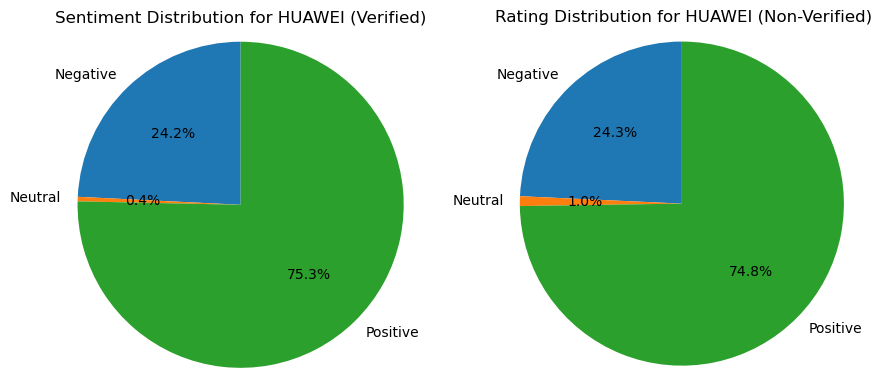

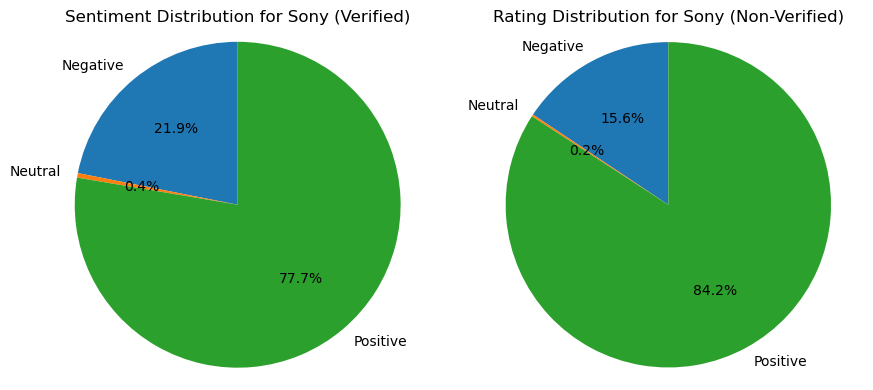

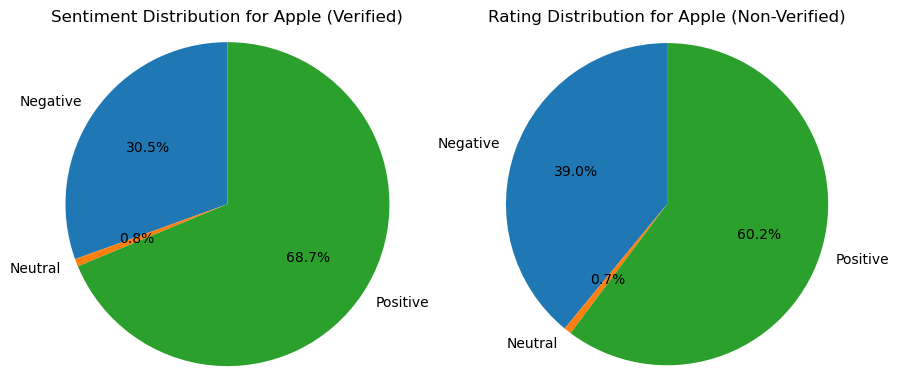

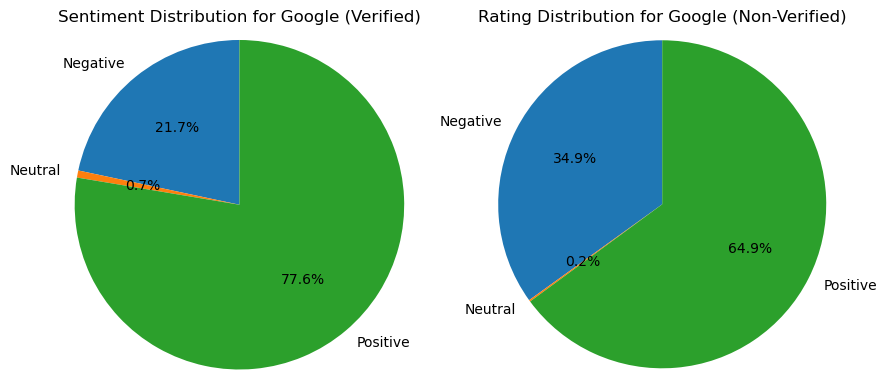

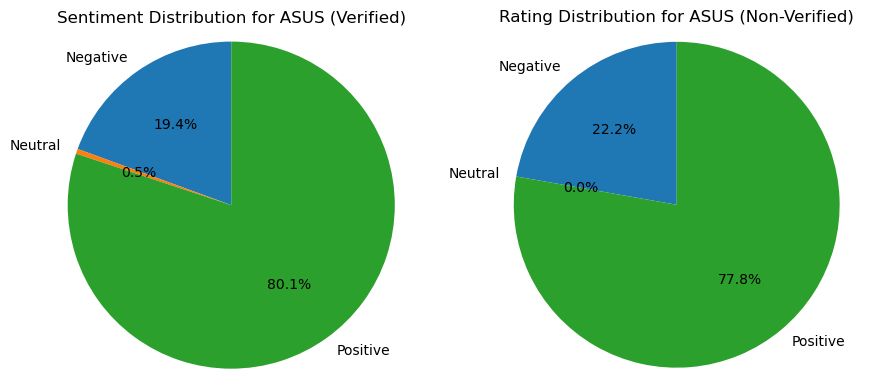

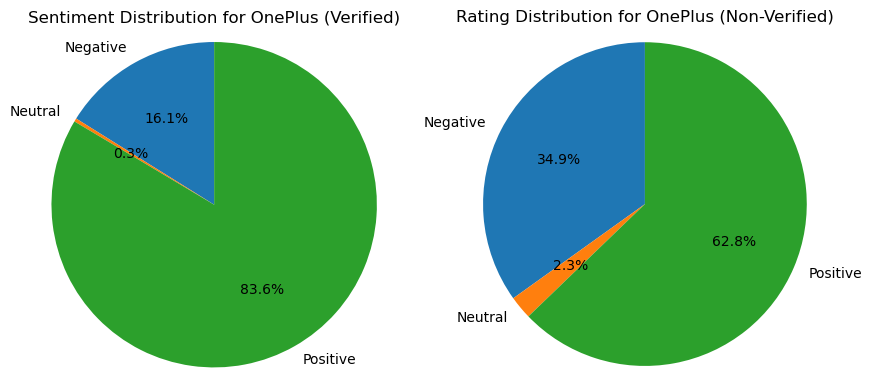

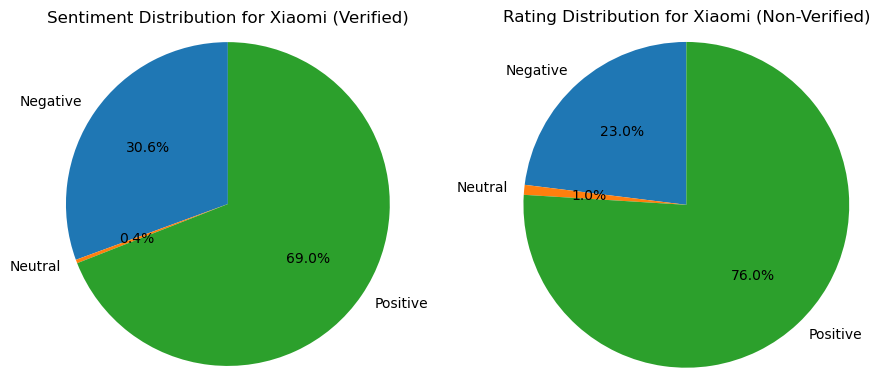

In [32]:
# Filter the data into verified and non-verified subsets
verified_data = df[df['verified'] == True]
non_verified_data = df[df['verified'] == False]

# Calculate the count of each sentiment for each brand in the verified subset
verified_sentiment_counts = verified_data.groupby(['brand', 'sentiment_combined']).size().unstack(fill_value=0)

# Calculate the count of each sentiment for each brand in the non-verified subset
non_verified_sentiment_counts = non_verified_data.groupby(['brand', 'sentiment_combined']).size().unstack(fill_value=0)

# Plotting the pie charts
brands = verified_data['brand'].unique()

for brand in brands:
    plt.figure(figsize=(9, 4))
    
    # Verified reviews pie chart
    plt.subplot(1, 2, 1)
    verified_sentiment = verified_sentiment_counts.loc[brand]
    plt.pie(verified_sentiment, labels=verified_sentiment.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Sentiment Distribution for {brand} (Verified)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

    # Non-verified reviews pie chart
    plt.subplot(1, 2, 2)
    non_verified_sentiment = non_verified_sentiment_counts.loc[brand]
    plt.pie(non_verified_sentiment, labels=non_verified_sentiment.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Rating Distribution for {brand} (Non-Verified)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

    plt.tight_layout()
    plt.show()

##### Word Cloud

In [33]:
#check the unique values in the 'sentiment_combined' column
unique_sentiments = df['sentiment_combined'].unique()
print(unique_sentiments)


['Negative' 'Positive' 'Neutral']


In [34]:
#check the length of the 'positive_reviews'
positive_reviews = " ".join(df[df['sentiment_combined'] == 'Positive']['clean_text'])
print("Number of characters in positive_reviews:", len(positive_reviews))


Number of characters in positive_reviews: 10957880


In [35]:
#check if there are any rows in your DataFrame where 'clean_text' is empty
empty_texts = df[df['clean_text'].apply(lambda x: len(x.strip()) == 0)]
print(empty_texts)


             asin  rating               date  verified  helpfulVotes  \
7535   B00EP2BN00       5  December 22, 2018      True           0.0   
16677  B00XQVDW6Y       1     March 14, 2018      True           0.0   
17616  B013XAPUW6       5       June 8, 2019      True           0.0   
19309  B018OMP8ES       5       June 8, 2019      True           0.0   
20535  B01BG1MW5C       2      July 23, 2019      True           0.0   
...           ...     ...                ...       ...           ...   
64707  B07VPMYXST       5  November 19, 2019      True           0.0   
65476  B07VZL3L5V       5  December 18, 2019      True           0.0   
65745  B07WGR47L9       4  November 29, 2019      True           0.0   
66529  B07WSJYDXX       5  December 11, 2018      True           0.0   
66625  B07WW25BSV       5  November 19, 2019      True           0.0   

          brand                                            product  \
7535    Samsung          Samsung Convoy 3, Gray (Verizon Wireless

In [36]:
'''
positive_reviews = " ".join(df[df['sentiment_combined'] == 'positive']['clean_text'])
wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      stopwords=None, 
                      min_font_size=10).generate(positive_reviews)

plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()
'''



'\npositive_reviews = " ".join(df[df[\'sentiment_combined\'] == \'positive\'][\'clean_text\'])\nwordcloud = WordCloud(width=800, height=800, \n                      background_color=\'white\', \n                      stopwords=None, \n                      min_font_size=10).generate(positive_reviews)\n\nplt.figure(figsize=(8, 8), facecolor=None) \nplt.imshow(wordcloud) \nplt.axis("off") \nplt.tight_layout(pad=0) \nplt.show()\n'

##### Sentiment by Review Length

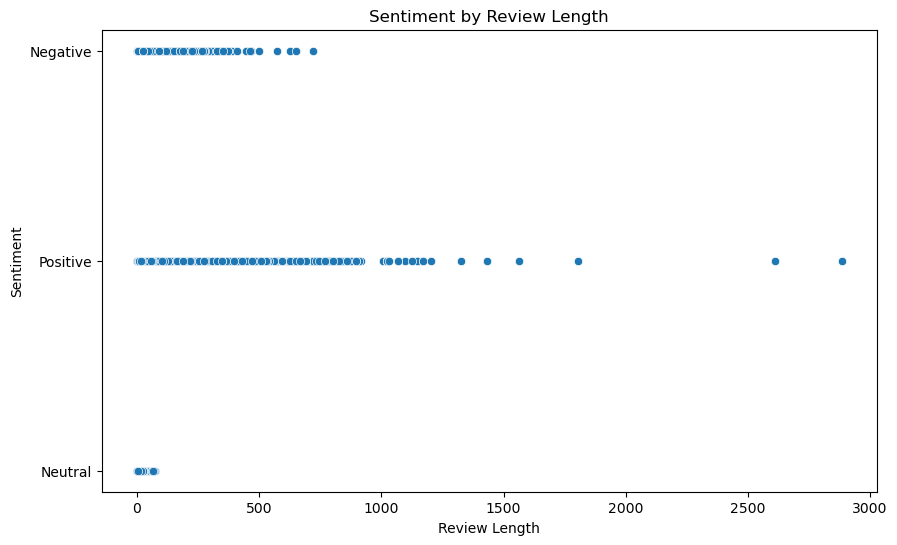

In [37]:
df['review_length'] = df['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='sentiment_combined', data=df)
plt.title('Sentiment by Review Length')
plt.xlabel('Review Length')
plt.ylabel('Sentiment')
plt.show()
